In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Importing libraries needed

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\DS\Project\avocado.csv.csv")
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
data = data.drop(['Unnamed: 0','Date'],axis=1)

Dropping these three columns which is not going to help us find the solution 

## Data Explanation

The dataset represents weekly 2018 retail scan data for National retail volume (units) and price.
It contains variables like
- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold
- Total bags
- Large bags
- Small bags
- Xlarge bags

The dataset has to be seen in two angles to find the region and find the average price .

One of Classification to find the region and other of Regression to find the average price.

# Exploratory Data Analysis

In [4]:
data.shape

(18249, 12)

There is a large no. of data to analyse

In [5]:
data.columns = ['AveragePrice', 'TotalVolume', 'PLU4046', 'PLU4225', 'PLU4770', 'TotalBags',
       'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'year', 'region']

Re-name the columns without spaces for easy use

In [6]:
data.columns

Index(['AveragePrice', 'TotalVolume', 'PLU4046', 'PLU4225', 'PLU4770',
       'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'year',
       'region'],
      dtype='object')

This helps in classification model. Since the skewed data cannot be used in classification model

## Identifying variables and data types

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   TotalVolume   18249 non-null  float64
 2   PLU4046       18249 non-null  float64
 3   PLU4225       18249 non-null  float64
 4   PLU4770       18249 non-null  float64
 5   TotalBags     18249 non-null  float64
 6   SmallBags     18249 non-null  float64
 7   LargeBags     18249 non-null  float64
 8   XLargeBags    18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


Region is of object type which has to be encoded

## Treating NaN values

In [8]:
data.isnull().sum()

AveragePrice    0
TotalVolume     0
PLU4046         0
PLU4225         0
PLU4770         0
TotalBags       0
SmallBags       0
LargeBags       0
XLargeBags      0
type            0
year            0
region          0
dtype: int64

There is no NaN values present in the dataset

## Visualisation of Categorical Variable

In [9]:
categorical_data = data[['type','region','year']]

conventional    9126
organic         9123
Name: type, dtype: int64


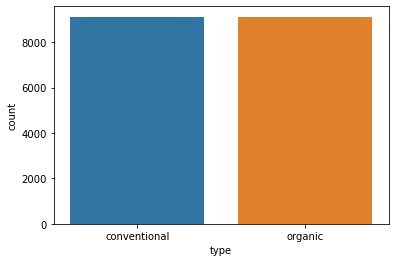

In [10]:
ax = sns.countplot(x = 'type', data = categorical_data)
print(categorical_data['type'].value_counts())

There are two types of avacados which are more or less equal

Tampa                  338
Jacksonville           338
NorthernNewEngland     338
Albany                 338
West                   338
SanFrancisco           338
Charlotte              338
SouthCentral           338
Chicago                338
Midsouth               338
RaleighGreensboro      338
StLouis                338
Detroit                338
Southeast              338
HarrisburgScranton     338
Syracuse               338
Boston                 338
DallasFtWorth          338
Columbus               338
Atlanta                338
Northeast              338
Roanoke                338
Spokane                338
Seattle                338
HartfordSpringfield    338
SouthCarolina          338
BuffaloRochester       338
NewYork                338
Louisville             338
Sacramento             338
LasVegas               338
MiamiFtLauderdale      338
California             338
BaltimoreWashington    338
Portland               338
Nashville              338
Indianapolis           338
D

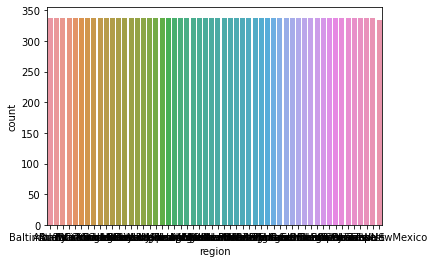

In [11]:
ax = sns.countplot(x = 'region', data = categorical_data)
print(categorical_data['region'].value_counts())

All regions have same amount of data (338) except WestTexNewMexico (335)

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


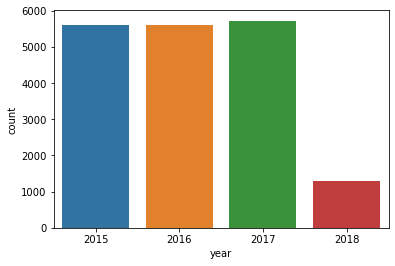

In [12]:
ax = sns.countplot(x = 'year', data = categorical_data)
print(categorical_data['year'].value_counts())

Only in 2018, there is very less data. Other years there is more or less equal amount of sales

## Visualisation of Continuous Variable

In [13]:
continuous_data = data.drop(['type','region','year'],axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

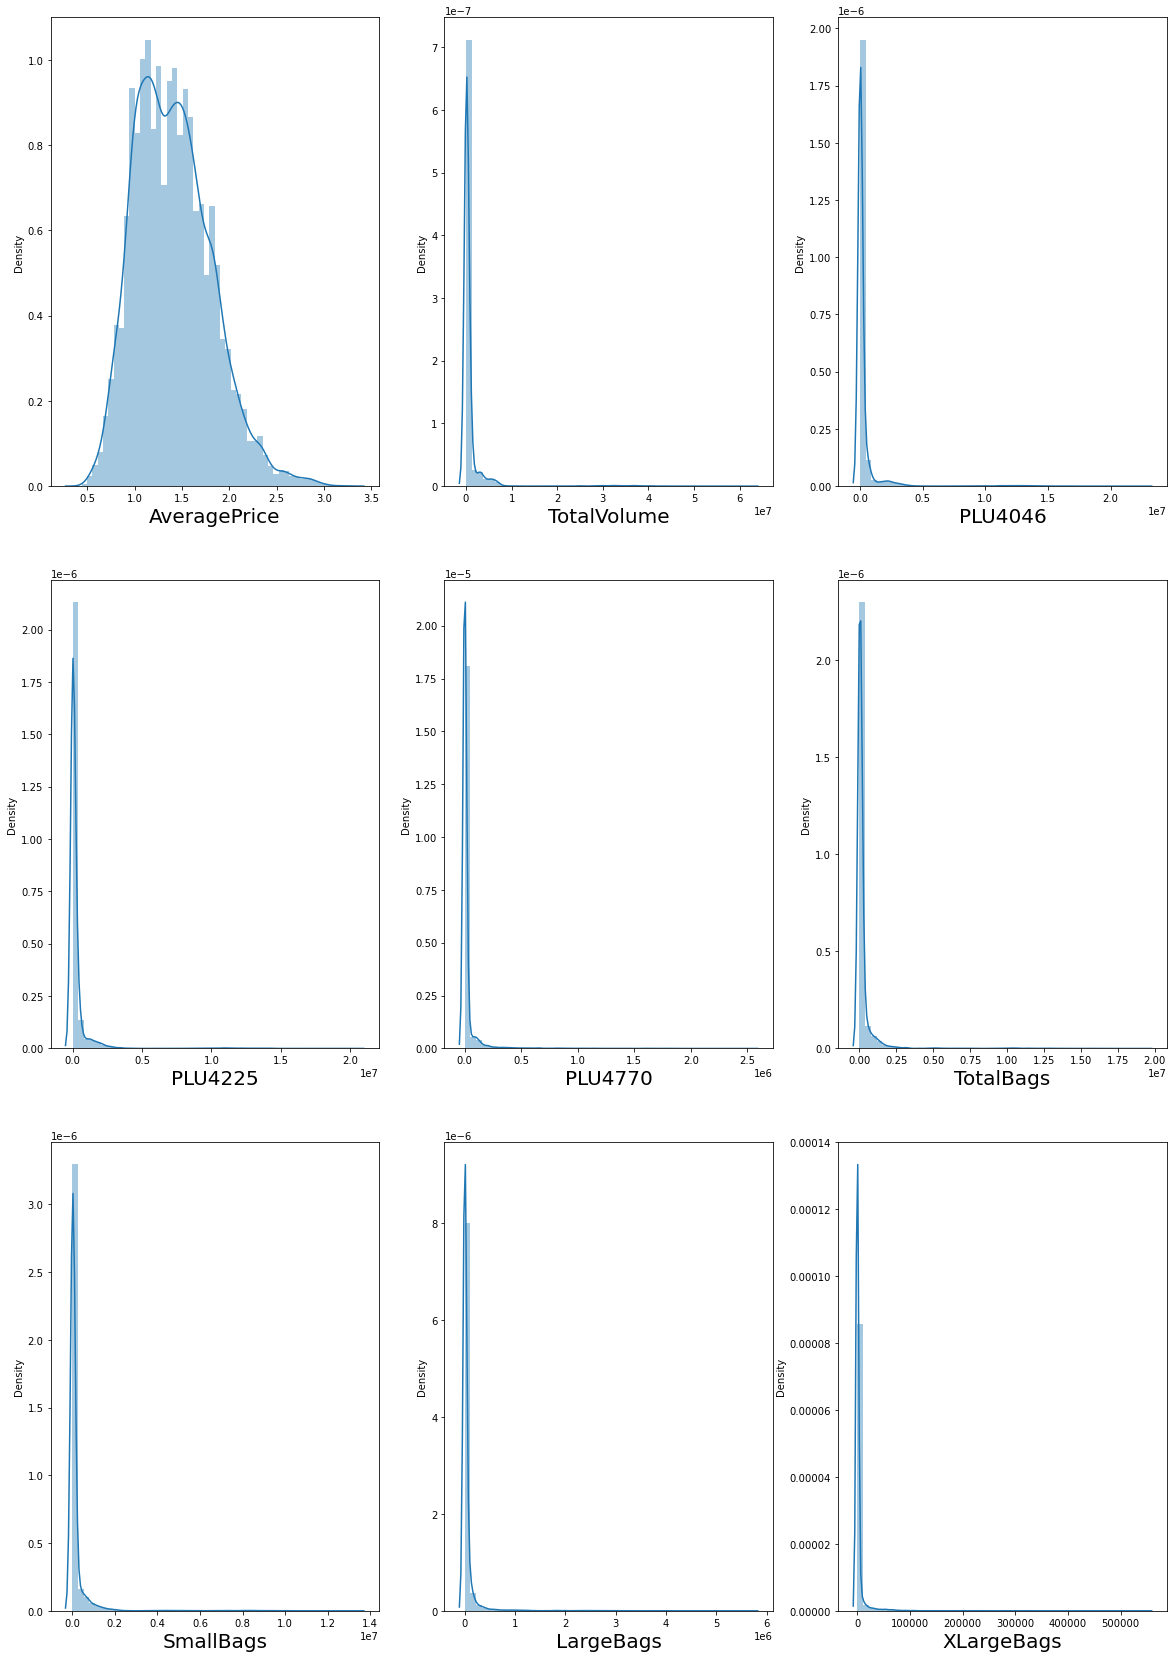

In [14]:
plt.figure(figsize = (20,50), facecolor = 'white')
plotnumber = 1

for column in continuous_data:
    if plotnumber <=15:
        ax =  plt.subplot(5,3,plotnumber)
        sns.distplot(continuous_data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

- AveragePrice - This is normally distributed
- TotalVolume - looks little skewed
- PLU4046 - looks little skewed
- PLU4225 - looks little skewed
- PLU4770 - looks little skewed
- TotalBags - looks little skewed
- SmallBags - looks little skewed
- LargeBags - looks little skewed
- XLargeBags - looks little skewed

## Encoding

In [15]:
print(data['type'].nunique())
print(data['region'].nunique())

2
54


In [16]:
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])
data['type'].value_counts()

0    9126
1    9123
Name: type, dtype: int64

The values are more or less equal for conventional (0) and organic (1)

In [18]:
data['region'] = le.fit_transform(data['region'])
data['region'].value_counts()

0     338
27    338
39    338
8     338
24    338
40    338
9     338
25    338
41    338
10    338
26    338
42    338
11    338
43    338
16    338
12    338
28    338
44    338
13    338
29    338
45    338
14    338
30    338
46    338
15    338
31    338
23    338
7     338
38    338
22    338
32    338
48    338
1     338
17    338
33    338
49    338
2     338
18    338
34    338
50    338
3     338
19    338
35    338
51    338
4     338
20    338
36    338
52    338
5     338
21    338
37    338
6     338
47    338
53    335
Name: region, dtype: int64

In [19]:
df_y = data['region'].copy()

In [20]:
df_y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

All 54 regions are assigned for integers

## Describing the data after encoding

In [21]:
data.describe()

,AveragePrice,TotalVolume,PLU4046,PLU4225,PLU4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


The data has to be standardised. Since all the columns(are encoded) is in integer/float, statistics for all columns is defined

## Correlation

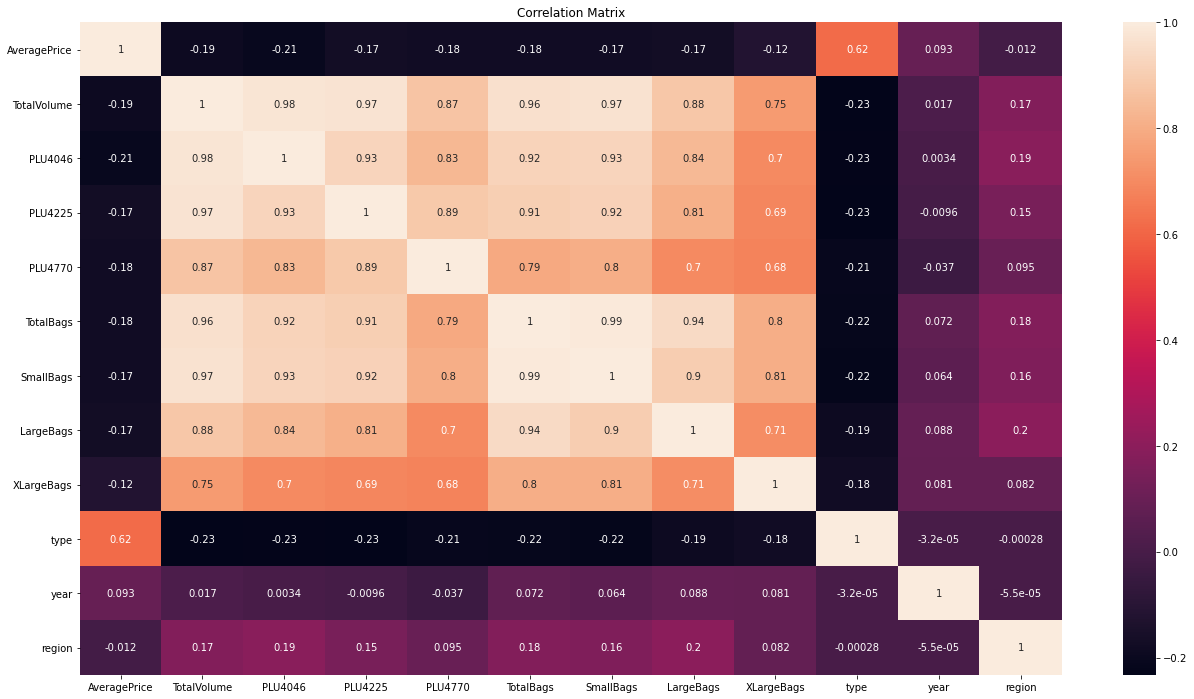

In [22]:
corr_mat = data.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot = True)
plt.title('Correlation Matrix')
plt.show()

- There is correlation between Total volume and PLU4046 of 0.98
- There is correlation between Total volume and PLU4225 of 0.97
- There is correlation between Total volume and Total bags of 0.96
- There is correlation between Total volume and small bags of 0.97
- There is correlation between Total bags and small bags of 0.99
- There is correlation between Total bags and Large bags of 0.94

## Confirming correlation existence

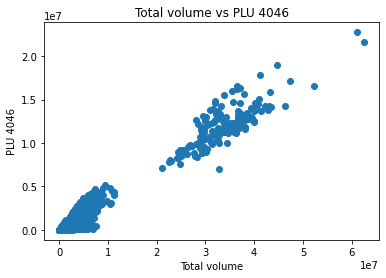

In [23]:
plt.scatter(data.TotalVolume, data.PLU4046)
plt.xlabel('Total volume')
plt.ylabel('PLU 4046')
plt.title ('Total volume vs PLU 4046')
plt.show()

Yes, both variables are correlated

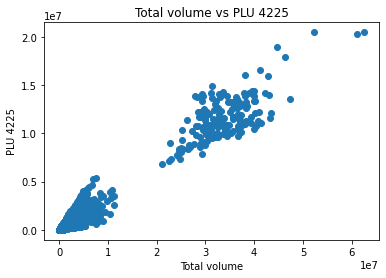

In [24]:
plt.scatter(data.TotalVolume, data.PLU4225)
plt.xlabel('Total volume')
plt.ylabel('PLU 4225')
plt.title ('Total volume vs PLU 4225')
plt.show()

Yes, both variables are correlated

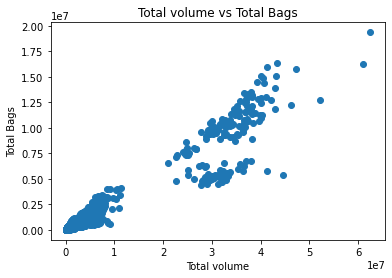

In [25]:
plt.scatter(data.TotalVolume, data.TotalBags)
plt.xlabel('Total volume')
plt.ylabel('Total Bags')
plt.title ('Total volume vs Total Bags')
plt.show()

Yes, both variables are correlated

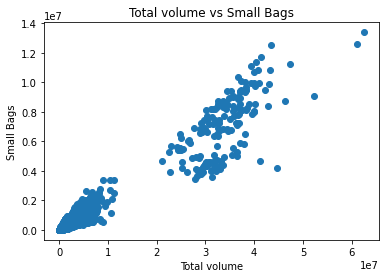

In [26]:
plt.scatter(data.TotalVolume, data.SmallBags)
plt.xlabel('Total volume')
plt.ylabel('Small Bags')
plt.title ('Total volume vs Small Bags')
plt.show()

Yes, both variables are correlated.
- So, we can remove TotalVolume

In [27]:
data = data.drop(['TotalVolume'],axis=1)

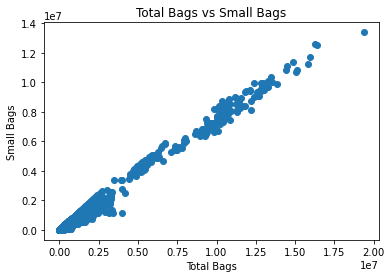

In [28]:
plt.scatter(data.TotalBags, data.SmallBags)
plt.xlabel('Total Bags')
plt.ylabel('Small Bags')
plt.title ('Total Bags vs Small Bags')
plt.show()

Yes, both variables are correlated

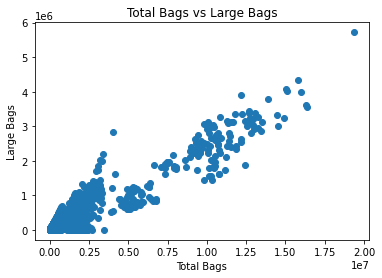

In [29]:
plt.scatter(data.TotalBags, data.LargeBags)
plt.xlabel('Total Bags')
plt.ylabel('Large Bags')
plt.title ('Total Bags vs Large Bags')
plt.show()

Yes, both variables are correlated.
- So, we can remove total bags

In [30]:
data = data.drop(['TotalBags'],axis=1)

## Collinearity

<function matplotlib.pyplot.show(close=None, block=None)>

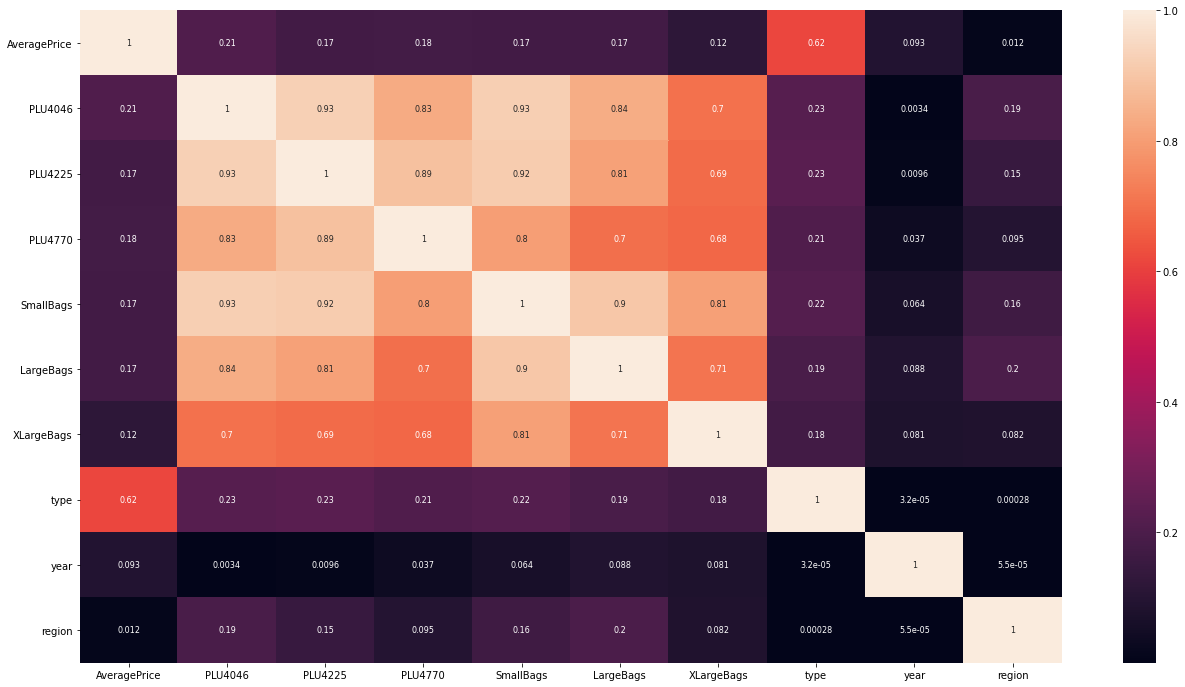

In [31]:
data_corr = data.corr().abs()
plt.figure (figsize = (22,12))
sns.heatmap(data_corr,annot = True, annot_kws = {'size':8}) 
plt.show

Though there is collinearity. It is of small amount. No need to treat it 

## Treat Skewness

In [32]:
data.skew()
data.skew().sort_values()

region           0.000030
type             0.000329
year             0.215339
AveragePrice     0.580303
PLU4046          8.648220
PLU4225          8.942466
SmallBags        9.540660
LargeBags        9.796455
PLU4770         10.159396
XLargeBags      13.139751
dtype: float64

We can use power transformation to treat skewness

In [33]:
from sklearn.preprocessing import power_transform
data_new = power_transform(data)  # this comes in nparray.so, convert to DataFrame
data = pd.DataFrame (data_new,columns = data.columns)

Treated the skewness, check whether it is treated

In [34]:
data.skew().sort_values(ascending=False)

XLargeBags      0.793520
year            0.213156
PLU4770         0.032184
SmallBags       0.007058
AveragePrice    0.005596
type            0.000329
PLU4225        -0.017740
PLU4046        -0.022679
LargeBags      -0.073809
region         -0.261443
dtype: float64

Skewness is treated using power transform function

## Treat Outliers

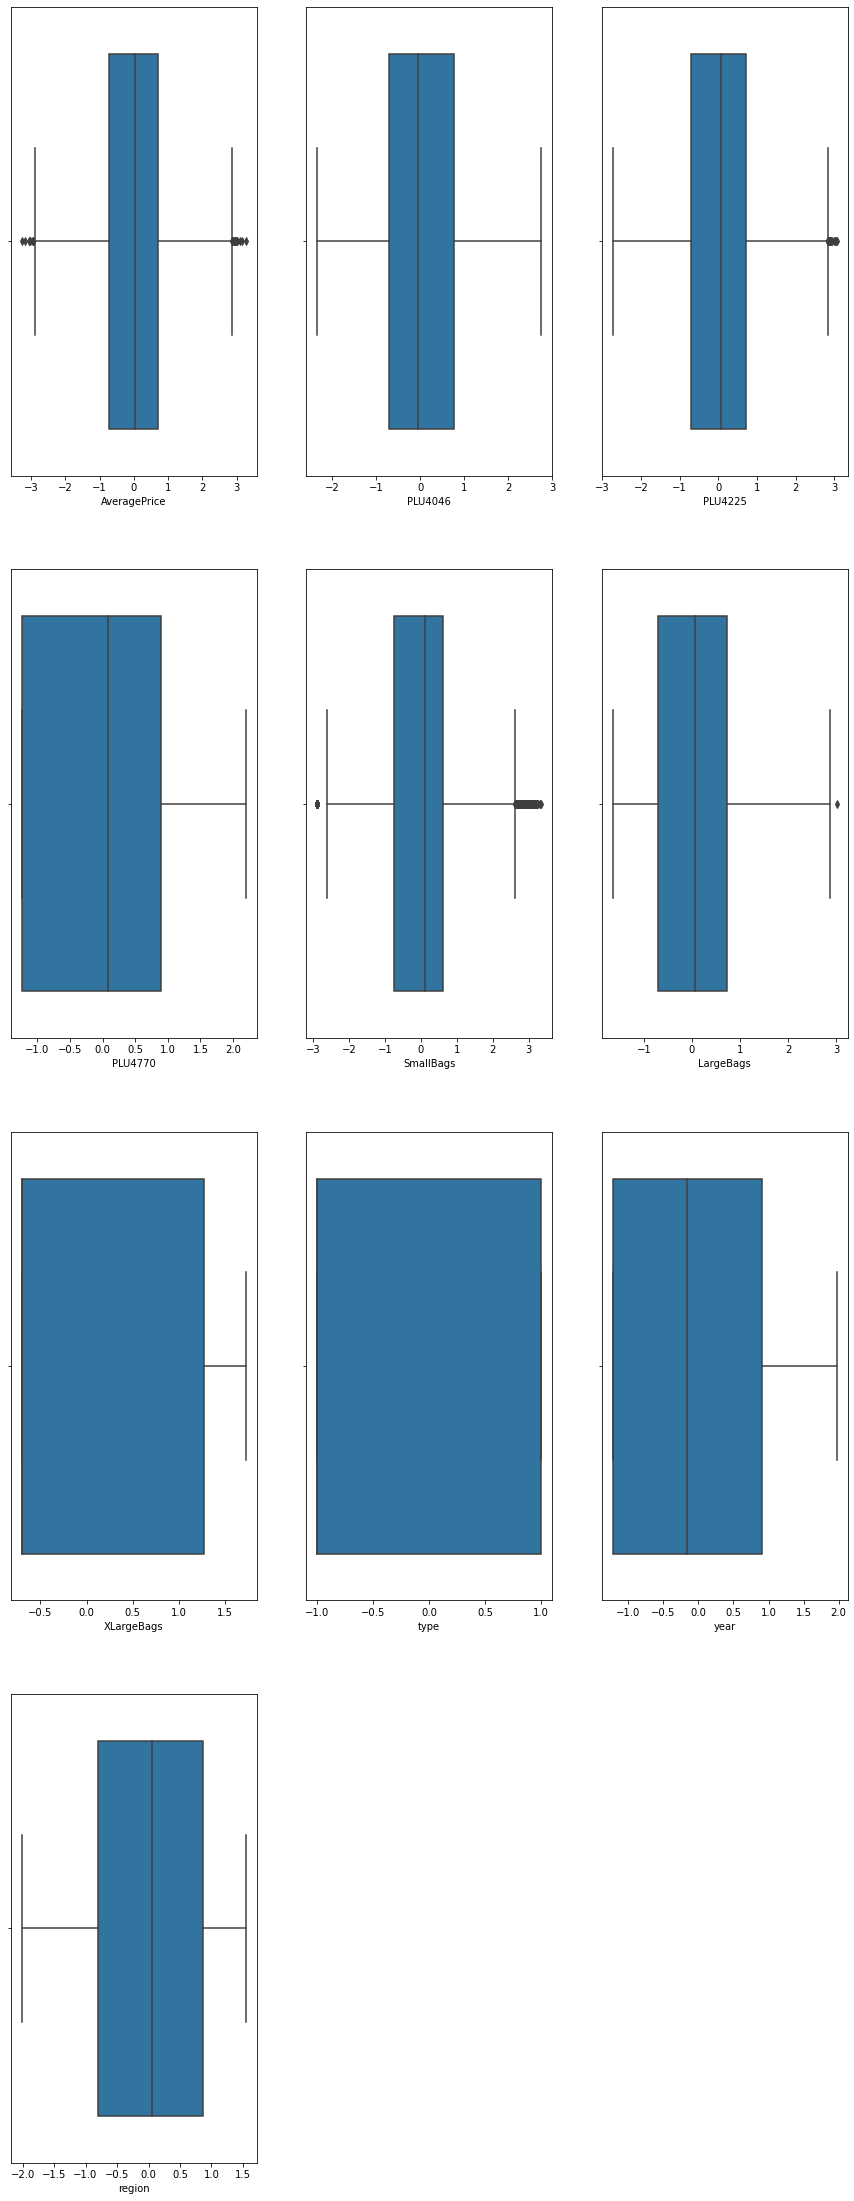

In [35]:
plt.figure(figsize=(15,50))
graph = 1
for column in data:
    if graph<=15:
        ax = plt.subplot(5,3,graph)
        sns.boxplot(data[column],orient = 'V')
        plt.xlabel(column, fontsize=10)
    graph+=1
plt.show()

There is outliers in Average price, PLU 4225, Small bags and Large bags

## Quantify

In [36]:
from scipy.stats import zscore
(np.abs(zscore(data))<3).all()

False

In [37]:
data['AveragePrice_zscore'] = zscore(data['AveragePrice'])
data['is_outlier'] = data['AveragePrice_zscore'].apply(lambda x: x<=-3 or x>=3)
data['PLU4225_zscore'] = zscore(data['PLU4225'])
data['is_outlier'] = data['PLU4225_zscore'].apply(lambda x: x<=-3 or x>=3)
data['SmallBags_zscore'] = zscore(data['SmallBags'])
data['is_outlier'] = data['SmallBags_zscore'].apply(lambda x: x<=-3 or x>=3)
data['LargeBags_zscore'] = zscore(data['LargeBags'])
data['is_outlier'] = data['LargeBags_zscore'].apply(lambda x: x<=-3 or x>=3)
data[data['is_outlier']]

,AveragePrice,PLU4046,PLU4225,PLU4770,SmallBags,LargeBags,XLargeBags,type,year,region,AveragePrice_zscore,is_outlier,PLU4225_zscore,SmallBags_zscore,LargeBags_zscore
9097,-1.480147,2.724982,3.053626,2.013957,3.342297,3.0064,1.714101,-0.999836,1.968548,1.442757,-1.480147,True,3.053626,3.342297,3.0064


Though we find more outliers, they are near the whiskers. Only one row has value more than 3.So, remove it.

In [38]:
data.drop([9097],inplace=True)

In [39]:
df = pd.DataFrame()
df = data.copy()

# REGRESSION MODEL

## Model Building

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

Importing necessary libraries

In [41]:
x = data.drop(columns = ['AveragePrice'])
y = data['AveragePrice']

Split the label and target variables

## Standardise the data

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

Thus the data is standardised

In [43]:
regression = LinearRegression()

Instantiate Linear Regression

In [44]:
maxreg = 0 
maxrs = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    acc = LR.score(x_test,y_test)
    if acc>maxreg:
        maxreg = acc
        maxrs = i
print('Best regression score is:',maxreg,'on Random State',maxrs)

Best regression score is: 1.0 on Random State 1


Best regression score is 1.0 at 1 random state

In [45]:
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size=0.20,random_state=1)

Check with all models, how it is behaving
## Linear Regression

In [46]:
LR.fit(x_train,y_train)
lr = LR.score(x_test,y_test)
print('Regression Score:',lr)

y_pred = LR.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Regression Score: 1.0
Mean Absolute Error: 3.2786050320609953e-15
Mean Squared Error: 1.5019289316821417e-29


## Decision Tree Regressor

In [47]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dtt = dt.score(x_test,y_test)
print('Regression Score:',dtt)

y_pred = dt.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Regression Score: 0.9999984382188013
Mean Absolute Error: 7.049649134412615e-05
Mean Squared Error: 1.5430029000134069e-06


## Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_ = rfr.score(x_test,y_test)
print('Regression Score:',rfr_)

y_pred = rfr.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Regression Score: 0.9999982284464503
Mean Absolute Error: 7.40216441325282e-05
Mean Squared Error: 1.7502530233516315e-06


Linear Rgression is the best model for this dataset with Regression score is 1.0

## Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score

sc = cross_val_score(LR,x,y,cv=5)
print('LR cvs:',sc.mean())

sc1 = cross_val_score(dt,x,y,cv=5)
print('DT cvs:',sc1.mean())

sc2 = cross_val_score(rfr,x,y,cv=5)
print('RFR cvs:',sc2.mean())

LR cvs: 1.0
DT cvs: 0.9999730125214684
RFR cvs: 0.9999774047219626


The cross validation score shows that Linear Regression model can be accpeted. Becuase both the r2 score and cross validation score is 1.0

## Hyper parameter Tuning

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

Import necessary libraries

In [51]:
params = {'n_estimators': [40,47,49,50], 'learning_rate':[0.30,0.40,0.45],'loss' : ['exponential'],'random_state' : [0]} 
rnd_search = RandomizedSearchCV (AdaBoostRegressor(), cv = 5, param_distributions = params,n_iter = 10,n_jobs=1)
print(rnd_search.fit(x_train,y_train))
print('Best Estimator:', rnd_search.best_estimator_)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=1,
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'loss': ['exponential'],
                                        'n_estimators': [40, 47, 49, 50],
                                        'random_state': [0]})
Best Estimator: AdaBoostRegressor(learning_rate=0.4, loss='exponential', random_state=0)


Check the best estimator and imply it

In [52]:
from sklearn import metrics
ada = AdaBoostRegressor(base_estimator = dt, learning_rate=0.4,n_estimators=47)
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

print('Accuracy post tuning')
print(metrics.r2_score(y_test,y_pred))

Accuracy post tuning
0.99999901641029


Accuracy post tuning the parameters is 0.99. So, use Linear regression to save the model

## Save the model

In [53]:
import joblib
joblib.dump(LR,'Avacado_reg_Model.pkl')

['Avacado_reg_Model.pkl']

Thus the model is saved for regression

# CLASSIFICATION MODEL

In [54]:
x = df.drop('region', axis = 1)
y = df_y

In [55]:
df_y.drop([9097],inplace=True)

Since this row is dropped during outlier removal

## Standardisation

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

Thus the data is standardised

## Finding best random state

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [60]:
maxacc = 0
maxrs = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    acc = LR.score(x_test,y_test)
    if acc>maxacc:
        maxacc = acc
        maxrs = i
print('Best accuracy is:',maxacc,'on Random State',maxrs)

Best accuracy is: 0.5260273972602739 on Random State 64


In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = 64)

## Logistic Regression

In [62]:
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print('Accuracy', accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 52.602739726027394
[[50  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 45 ...  0  0  3]
 ...
 [ 0  0  0 ... 61  2  0]
 [ 0  0  0 ...  0 64  0]
 [ 0  3  0 ...  0  0  6]]
              precision    recall  f1-score   support

           0       0.56      0.74      0.64        68
           1       0.21      0.39      0.27        61
           2       0.63      0.61      0.62        74
           3       0.60      0.40      0.48        67
           4       0.55      0.45      0.49        78
           5       0.55      0.32      0.41        71
           6       0.80      0.88      0.84        77
           7       0.70      0.83      0.76        76
           8       0.58      0.78      0.67        73
           9       0.54      0.72      0.62        64
          10       0.46      0.36      0.40        59
          11       0.61      0.63      0.62        63
          12       0.46      0.53      0.49        62
          13       0.35      0.22      0.27        78
     

Accuracy score is 0.53
## Decision tree classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('Accuracy', accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 80.65753424657535
[[49  0  0 ...  0  0  0]
 [ 0 42  0 ...  0  0  1]
 [ 0  0 66 ...  0  0  0]
 ...
 [ 0  0  0 ... 62  0  0]
 [ 0  0  0 ...  0 65  0]
 [ 0  0  0 ...  0  0 46]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73        68
           1       0.68      0.69      0.68        61
           2       0.93      0.89      0.91        74
           3       0.80      0.82      0.81        67
           4       0.88      0.85      0.86        78
           5       0.71      0.68      0.69        71
           6       0.94      0.95      0.94        77
           7       0.75      0.83      0.79        76
           8       0.93      0.90      0.92        73
           9       0.89      0.73      0.80        64
          10       0.65      0.68      0.66        59
          11       0.90      0.87      0.89        63
          12       0.77      0.77      0.77        62
          13       0.79      0.86      0.82        78
      

Accuracy score is 0.81
## Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print('Accuracy', accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 90.43835616438356
[[61  0  0 ...  0  0  0]
 [ 0 54  0 ...  0  0  0]
 [ 0  0 74 ...  0  0  0]
 ...
 [ 0  0  0 ... 63  0  0]
 [ 0  0  0 ...  0 70  0]
 [ 0  0  0 ...  0  0 51]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        68
           1       0.75      0.89      0.81        61
           2       0.97      1.00      0.99        74
           3       0.92      0.85      0.88        67
           4       0.96      0.96      0.96        78
           5       0.82      0.82      0.82        71
           6       0.99      1.00      0.99        77
           7       0.88      0.93      0.90        76
           8       1.00      0.97      0.99        73
           9       0.93      0.80      0.86        64
          10       0.82      0.80      0.81        59
          11       0.91      0.97      0.94        63
          12       0.83      0.95      0.89        62
          13       0.88      0.85      0.86        78
      

Accuracy score is 0.90
## SVC

In [65]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('Accuracy', accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 80.73972602739727
[[65  0  0 ...  0  0  0]
 [ 0 39  0 ...  0  0  0]
 [ 0  0 72 ...  0  0  0]
 ...
 [ 0  0  0 ... 63  0  0]
 [ 0  0  0 ...  0 68  0]
 [ 0  1  0 ...  0  0 39]]
              precision    recall  f1-score   support

           0       0.78      0.96      0.86        68
           1       0.45      0.64      0.53        61
           2       0.99      0.97      0.98        74
           3       0.89      0.75      0.81        67
           4       0.91      0.88      0.90        78
           5       0.82      0.66      0.73        71
           6       1.00      0.99      0.99        77
           7       0.73      0.82      0.77        76
           8       0.99      0.93      0.96        73
           9       0.67      0.73      0.70        64
          10       0.54      0.63      0.58        59
          11       0.83      0.87      0.85        63
          12       0.82      0.95      0.88        62
          13       0.68      0.63      0.65        78
      

Accuracy score is 0.81
- On comparing all the accuracy scores, RandomForestClassifier,DecisionTreeClassifier and SVC all has the same accuracy score. Cross check with cross validation score. 

## Cross-Validation

In [66]:
from sklearn.model_selection import cross_val_score

sc = cross_val_score(LR,x,y,cv=10)
print('LR cvs:',sc.mean())

sc1 = cross_val_score(dt,x,y,cv=10)
print('DT cvs:',sc1.mean())

sc2 = cross_val_score(rf,x,y,cv=10)
print('RFC cvs:',sc2.mean())

sc3 = cross_val_score(svc,x,y,cv=10)
print('SVC cvs:',sc3.mean())

LR cvs: 0.4331930124969959
DT cvs: 0.6436265621244893
RFC cvs: 0.7685708062965634
SVC cvs: 0.7071905791876952


- The cross validation score for Logistic regression is 0.43
    - Accuracy is 0.53
- The cross validation score for Decision tree classifier is 0.64
    - Accuracy is 0.81
- The cross validation score for Random forest classifier is 0.76
    - Accuracy is 0.90
- The cross validation score for SVC is 0.70
    - Accuracy is 0.81
    
 Based on CV score and accuracy score, Random Forest Classifier looks better compared to other scores.
 ## Hyper parameter tuning

In [67]:
from sklearn.model_selection import GridSearchCV

In [70]:
parameters = {'max_features':['auto'],
             'max_depth':[4,5,6],
             'criterion':['gini','entropy'],
             'random_state' : [64]
         }

GVC = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GVC.fit(x_train,y_train)
GVC.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'random_state': 64}

In [71]:
GVC_pred=GVC.best_estimator_.predict(x_test)
accuracy_score(y_test,GVC_pred)

0.7024657534246576

On tuning the parameters, the score is 0.70. So, use the RandomForestRegressor model to evaluate.

## Save the model

In [75]:
import joblib
joblib.dump(rf,'Avacado_clas.pkl')

['Avacado_clas.pkl']

Thus the model is saved